In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 

In [2]:
data =pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data.shape

(400, 11)

In [7]:
data1 = pd.Series(data['Sales'])
s=[]
for i in data1:
    if i>9:
        s.append('good')
    else:
        s.append('bad')
print(s)

['good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad'

In [8]:
data2 = pd.DataFrame(s)
data3 = pd.concat([data2,data],axis=1)
data3 = data3.rename({0:'o/p'},axis=1)
data3

,o/p,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,good,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,good,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,good,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,bad,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,bad,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,good,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,bad,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,bad,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,bad,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [9]:
labelencoder = LabelEncoder()
data3.iloc[:,7] = labelencoder.fit_transform(data3.iloc[:,7])
data3.iloc[:,-1] = labelencoder.fit_transform(data3.iloc[:,-1])
data3.iloc[:,-2] = labelencoder.fit_transform(data3.iloc[:,-2])
data3.iloc[:,0] = labelencoder.fit_transform(data3.iloc[:,0])

In [10]:
data3

,o/p,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,0,42,17,1,1
1,1,11.22,111,48,16,260,83,1,65,10,1,1
2,1,10.06,113,35,10,269,80,2,59,12,1,1
3,0,7.40,117,100,4,466,97,2,55,14,1,1
4,0,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,12.57,138,108,17,203,128,1,33,14,1,1
396,0,6.14,139,23,3,37,120,2,55,11,0,1
397,0,7.41,162,26,12,368,159,2,40,18,1,1
398,0,5.94,100,79,7,284,95,0,50,12,1,1


In [11]:
array = data3.values
array

array([[  1.  ,   9.5 , 138.  , ...,  17.  ,   1.  ,   1.  ],
       [  1.  ,  11.22, 111.  , ...,  10.  ,   1.  ,   1.  ],
       [  1.  ,  10.06, 113.  , ...,  12.  ,   1.  ,   1.  ],
       ...,
       [  0.  ,   7.41, 162.  , ...,  18.  ,   1.  ,   1.  ],
       [  0.  ,   5.94, 100.  , ...,  12.  ,   1.  ,   1.  ],
       [  1.  ,   9.71, 134.  , ...,  16.  ,   1.  ,   1.  ]])

In [12]:
x = array[:,2:10]
y = array[:,0]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 25,test_size = 0.25)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(300, 8)
(300,)
(100, 8)
(100,)


In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
log_model = LogisticRegression()
cv_score = cross_val_score(estimator=log_model,X=x,y=y,cv=5)
print('cv score for 5 fold = {}\nMean = {}\nStd = {}.'.format(cv_score,cv_score.mean(),cv_score.std()))

cv score for 5 fold = [0.8375 0.8125 0.875  0.8125 0.775 ]
Mean = 0.8225
Std = 0.03297726489568229.


In [17]:
rf_model = RandomForestClassifier( n_estimators=100,criterion='gini',max_depth=None,min_samples_split=2)
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
grid_model = GridSearchCV(estimator = rf_model,param_grid = {'n_estimators':[20,30,40,50,60],
                                                             'criterion':['gini','entropy'],
                                                             'max_depth':[2,3,4,5,6,7],
                                                             'random_state':[2,3,4,5]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 20, 'random_state': 3}
0.8433333333333334


In [19]:
y_pred_train = rf_model.predict(x_train)
y_pred_train

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [20]:
y_pred_test = rf_model.predict(x_test)
y_pred_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.])

In [21]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       212
         1.0       1.00      1.00      1.00        88

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [22]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90        75
         1.0       0.85      0.44      0.58        25

    accuracy                           0.84       100
   macro avg       0.84      0.71      0.74       100
weighted avg       0.84      0.84      0.82       100



In [23]:
confusion_matrix(y_train,y_pred_train)

array([[212,   0],
       [  0,  88]], dtype=int64)

In [24]:
confusion_matrix(y_test,y_pred_test)

array([[73,  2],
       [14, 11]], dtype=int64)

1.0


Text(0, 0.5, 'True Positive Rate')

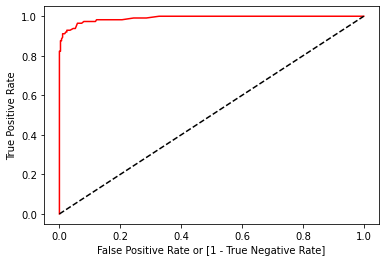

In [25]:
fpr, tpr, thresholds = roc_curve(y, rf_model.predict_proba (x)[:,1])

auc = roc_auc_score(y_train, y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

0.7066666666666667


Text(0, 0.5, 'True Positive Rate')

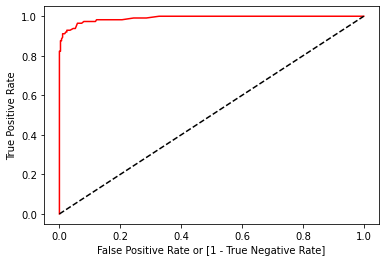

In [26]:
fpr, tpr, thresholds = roc_curve(y, rf_model.predict_proba (x)[:,1])

auc = roc_auc_score(y_test, y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')